In [1]:
## Projet Maman

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
donnees_init = pd.read_csv('Initial.csv').set_index("Question cachée pour enregistrer l'ID anonymisé des apprenants.\xa0")
donnees_fin = pd.read_csv('Final.csv').set_index("Question cachée pour enregistrer l'ID anonymisé des apprenants.\xa0")
donnees_init = donnees_init.dropna(subset=["Date de soumission"])
donnees_fin = donnees_fin.dropna(subset=["Date de soumission"])
donnees_init = donnees_init[~donnees_init.index.duplicated()]
donnees_index= donnees_fin.index.intersection(donnees_init.index)
donnees_columns=[]
for i in list(donnees_init.columns):
    if i not in list(donnees_fin.columns):
        donnees_columns+=[i]
donnees=pd.concat([donnees_init.loc[list(donnees_index),donnees_columns],donnees_fin.loc[list(donnees_index),:]],axis=1)
donnees

Indiquez votre genre :  \
Question cachée pour enregistrer l'ID anonymisé...                          
217ba8a7fafa77ac394998c6998cc603                                 Masculin   
57b9d1400938c1a73c89812eb7af6bdc                                 Masculin   
3fc2553edccc8ce04ff4284658a43487                                 Masculin   
b0d8849cabfd978d26bf972a065187ab                                 Masculin   
754f45c6a8f0b015f5e6ca7cf5ef80b6                                  Féminin   
f7761dbf5e688ce6ed562c39d3e11475                                  Féminin   
2386bd0a28a48d17116638ec221d560d                                 Masculin   
c1be096ce5a0b3b0084e344aef021f79                                  Féminin   
561f29363a95279df3290b2b9e82d6e0                                  Féminin   
ec9afc2f389140fd3f1bffb60bd86a40                                  Féminin   
db689cfbd0b4e3bd8e301c603975e6c8                                 Masculin   
74770e64a71b0b5f820b020426051f03                                  Féminin   
ea207563bd2097b8bc663c0fd8f8e38a                                 Masculin   
2bee89fcead0b44bf5febf8e2fed610d                                  Féminin   
5da49e44873587b02454888c63deb52f                                 Masculin   
639fe20eabd06f996a7db5869873ab64                                 Masculin   
903ba28f62ed8331f61b08d02bfc7573                                 Masculin   
ced38cde67fec1edb24638c4c3b98dd3                                 Masculin   
ef43fa481d86f164e9cae5ed6b8625cd                                  Féminin   
08746c38508e5f7e5cd043e919a322cd                                 Masculin   
209e6fa51d4c3fee4545b21fdd7eca8b                                 Masculin   
af9b058c03104c60f98b72ff537392fb                                 Masculin   
fa262f8c0f20ff60b18258db792d9f46                                 Masculin   

                                                   Quel est votre pays de résidence ?  \
Question cachée pour enregistrer l'ID anonymisé...                                      
217ba8a7fafa77ac394998c6998cc603                                               France   
57b9d1400938c1a73c89812eb7af6bdc                                               France   
3fc2553edccc8ce04ff4284658a43487                                               France   
b0d8849cabfd978d26bf972a065187ab                                               France   
754f45c6a8f0b015f5e6ca7cf5ef80b6                                               France   
f7761dbf5e688ce6ed562c39d3e11475                                               France   
2386bd0a28a48d17116638ec221d560d                                               France   
c1be096ce5a0b3b0084e344aef021f79                                               France   
561f29363a95279df3290b2b9e82d6e0                                               France   
ec9afc2f389140fd3f1bffb60bd86a40                                               France   
db689cfbd0b4e3bd8e301c603975e6c8                                               France   
74770e64a71b0b5f820b020426051f03                                               France   
ea207563bd2097b8bc663c0fd8f8e38a                                               France   
2bee89fcead0b44bf5febf8e2fed610d                                               France   
5da49e44873587b02454888c63deb52f                                               France   
639fe20eabd06f996a7db5869873ab64                                               France   
903ba28f62ed8331f61b08d02bfc7573                                              Tunisie   
ced38cde67fec1edb24638c4c3b98dd3                                               France   
ef43fa481d86f164e9cae5ed6b8625cd                                               France   
08746c38508e5f7e5cd043e919a322cd                                               France   
209e6fa51d4c3fee4545b21fdd7eca8b                                               France   
af9b058c03104c60f98b72ff537392fb                                              

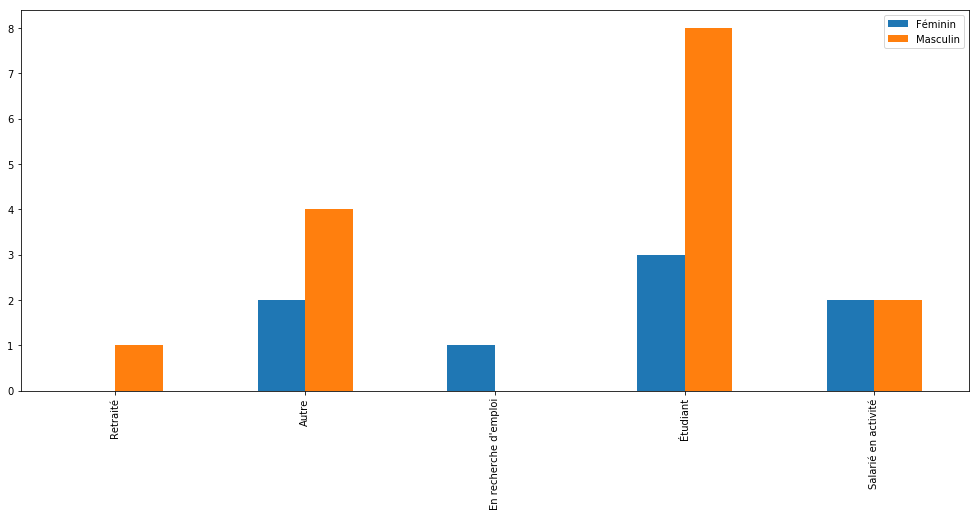

Féminin  Masculin
Retraité                     0         1
Autre                        2         4
En recherche d'emploi        1         0
Étudiant                     3         8
Salarié en activité          2         2

In [155]:
def hist_double_situation_professionnelle(colonne):
    liste_situation=list(set(donnees.loc[:,"Quelle est votre situation professionnelle ?"].values))
    liste_colonne=list(set(donnees.loc[:,colonne].values))
    if np.nan in liste_situation:
        del liste_situation[liste_situation.index(np.nan)]
    if np.nan in liste_colonne:
        del liste_colonne[liste_colonne.index(np.nan)]
    liste_dico=[]
    for situation in liste_situation:
        dico={}
        for item_colonne in liste_colonne:
            dico[item_colonne]=donnees.loc[(donnees.loc[:,"Quelle est votre situation professionnelle ?"]==situation) & (donnees.loc[:,colonne]==item_colonne),colonne].count()
        liste_dico.append(dico)
    pd.DataFrame(liste_dico,index=liste_situation).plot(kind='bar',figsize=(17,7))
    plt.show()
    return pd.DataFrame(liste_dico,index=liste_situation)

hist_double_situation_professionnelle("Indiquez votre genre :")

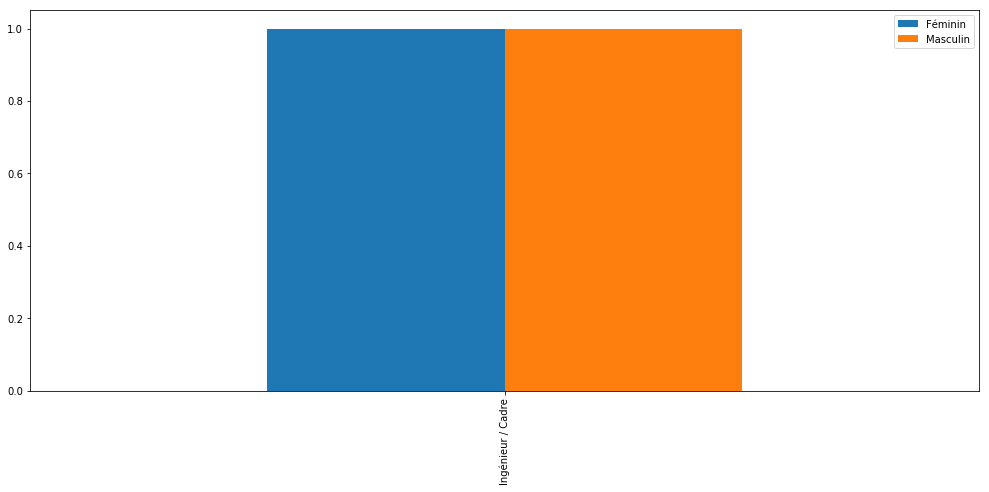

Féminin  Masculin
Ingénieur / Cadre        1         1

In [156]:
def hist_double_fonction(colonne):
    liste_fonction=list(set(donnees.loc[:,"Quelle est votre fonction ?"].values))
    liste_colonne=list(set(donnees.loc[:,colonne].values))
    if np.nan in liste_fonction:
        del liste_fonction[liste_fonction.index(np.nan)]
    if np.nan in liste_colonne:
        del liste_colonne[liste_colonne.index(np.nan)]
    liste_dico=[]
    for fonction in liste_fonction:
        dico={}
        for item_colonne in liste_colonne:
            dico[item_colonne]=donnees.loc[(donnees.loc[:,"Quelle est votre fonction ?"]==fonction) & (donnees.loc[:,colonne]==item_colonne),colonne].count()
        liste_dico.append(dico)
    pd.DataFrame(liste_dico,index=liste_fonction).plot(kind='bar',figsize=(17,7))
    plt.show()
    return pd.DataFrame(liste_dico,index=liste_fonction)

hist_double_fonction("Indiquez votre genre :")

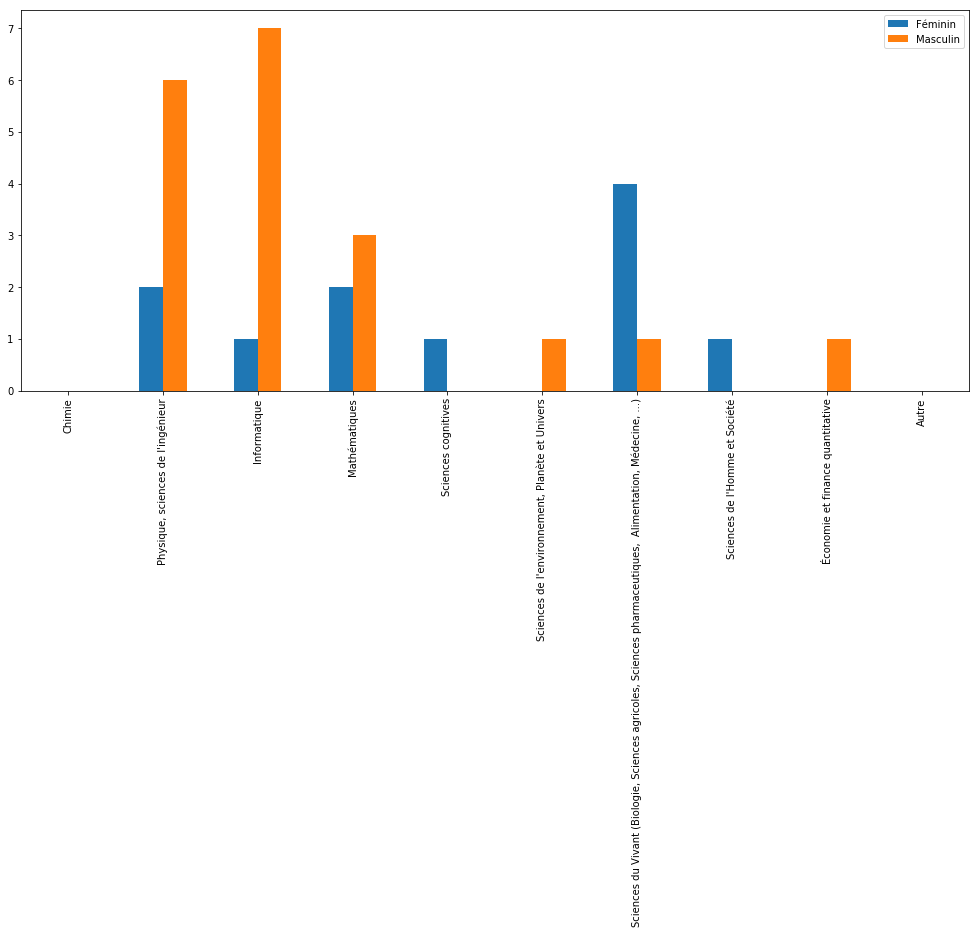

Féminin  Masculin
Chimie                                                    0         0
Physique, sciences de l'ingénieur                         2         6
Informatique                                              1         7
Mathématiques                                             2         3
Sciences cognitives                                       1         0
Sciences de l'environnement, Planète et Univers           0         1
Sciences du Vivant (Biologie, Sciences agricole...        4         1
Sciences de l'Homme et Société                            1         0
Économie et finance quantitative                          0         1
Autre                                                     0         0

In [16]:
def hist_double_discipline(colonne):
    liste_discipline=[]
    liste_colonne=list(set(donnees.loc[:,colonne].values))
    for col in list(donnees.columns):
        if "Quelle est votre discipline ?" in col:
            liste_discipline.append(col.split('[')[1].strip(']'))
    liste_dico=[]
    for discipline in liste_discipline:
        dico={}
        for item_colonne in liste_colonne:
            dico[item_colonne]=donnees.loc[(donnees.loc[:,f"Quelle est votre discipline ? [{discipline}]"]=="Oui") & (donnees.loc[:,colonne]==item_colonne),colonne].count()
        liste_dico.append(dico)
    pd.DataFrame(liste_dico,index=liste_discipline).plot(kind='bar',figsize=(17,7))
    plt.show()
    return pd.DataFrame(liste_dico,index=liste_discipline)
            
            
hist_double_discipline("Indiquez votre genre :")